/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


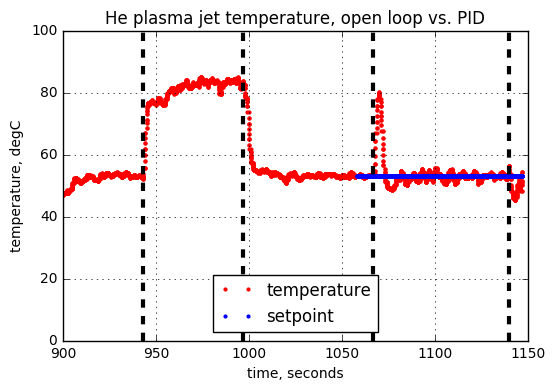

In [1]:
%matplotlib inline

import numpy
from matplotlib import pyplot
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", module="numpy")

fname = 'data_temperature.csv'
col_names = ('dt','ms','temperature','set','ctrl_output')
col_dtypes = (datetime,int,float,float,float)

convertfunc = lambda s: float(s)*(1./1000.)

data = numpy.genfromtxt(fname,delimiter=',',usecols=(1,2,3,4),max_rows=4200,
                        dtype=col_dtypes,names=col_names,invalid_raise=False,
                       converters = {'ms': convertfunc})

fig = pyplot.figure()
ax = fig.add_subplot('111')

set_offset= 2750

ax.plot(data['ms'],data['temperature'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='temperature')
ax.plot(data['ms'][set_offset:],data['set'][set_offset:],color='blue',
        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='setpoint')

ax.axvline(943,0,250,color='black', linewidth=3, linestyle='--')
ax.axvline(997,0,250,color='black', linewidth=3, linestyle='--')
ax.axvline(1067,0,250,color='black', linewidth=3, linestyle='--')
ax.axvline(1140,0,250,color='black', linewidth=3, linestyle='--')

ax.set_ylim([0,100])
ax.set_xlim([900,1150])
ax.grid()
ax.legend(loc=8)

ax.set_ylabel('temperature, degC')
ax.set_xlabel('time, seconds')
ax.set_title('He plasma jet temperature, open loop vs. PID')

fig.show()